## > Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## > Tampilan Dataset

In [21]:
dataset_insurance = pd.read_csv('insurance.csv')
dataset_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## > Drop Data

In [22]:
dataset_insurance = dataset_insurance.drop(['sex', 'children', 'smoker', 'age', 'region'], axis = 1)
dataset_insurance

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


## > Clustering

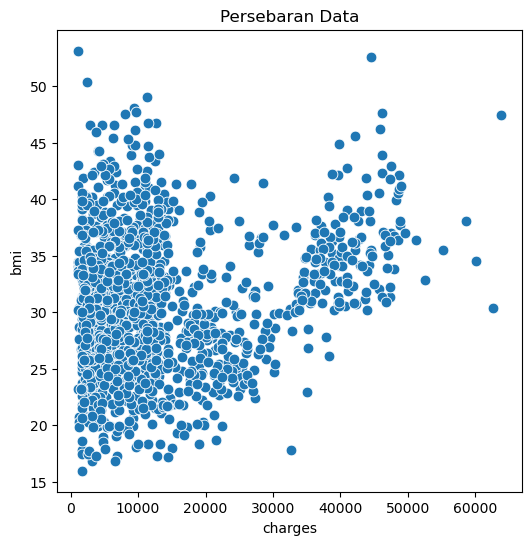

In [23]:
# persebaran data 
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'charges', y = 'bmi', data = dataset_insurance, s = 60)
plt.title('Persebaran Data')
plt.show()

## > Elbow Methode

In [24]:
# hitung within cluster sum of squared error (wcss) untuk tiap kluster yang berbeda
from sklearn.cluster import KMeans

wcss = []
for i in range (1,11): 
    kmModel = KMeans(n_clusters = i, n_init = 10)
    kmModel.fit(dataset_insurance)
    wcss.append(kmModel.inertia_)

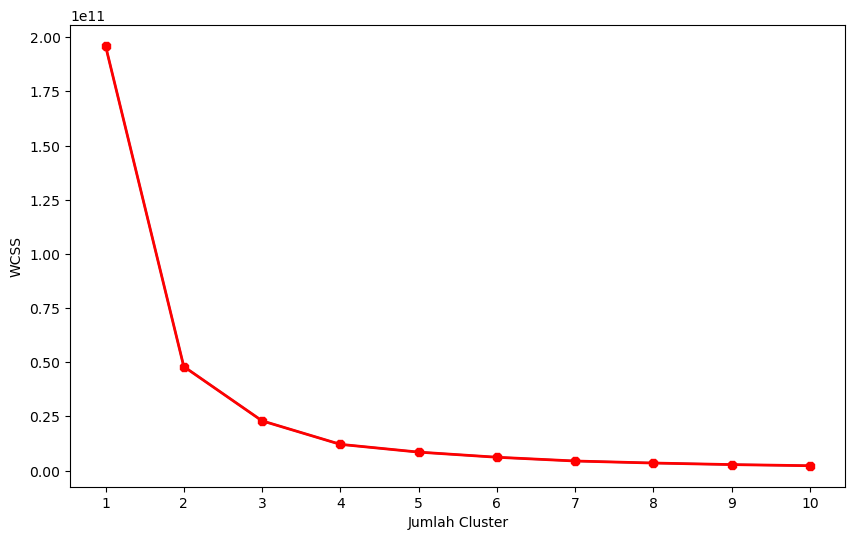

In [25]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [26]:
# model dengan 5 cluster

kmModelFix = KMeans(n_clusters = 5, n_init = 10) # n_init = 10 / n_init = 'auto'
kmModelFix.fit(dataset_insurance)

# memprediksi hasil
hasil_prediksi = kmModelFix.predict(dataset_insurance)
hasil_prediksi

array([4, 0, 0, ..., 0, 0, 1])

In [29]:
dataset_insurance['Label'] = hasil_prediksi
dataset_insurance.head()

,bmi,charges,Label
0,27.900,16884.92400,4
1,33.770,1725.55230,0
2,33.000,4449.46200,0
3,22.705,21984.47061,4
4,28.880,3866.85520,0


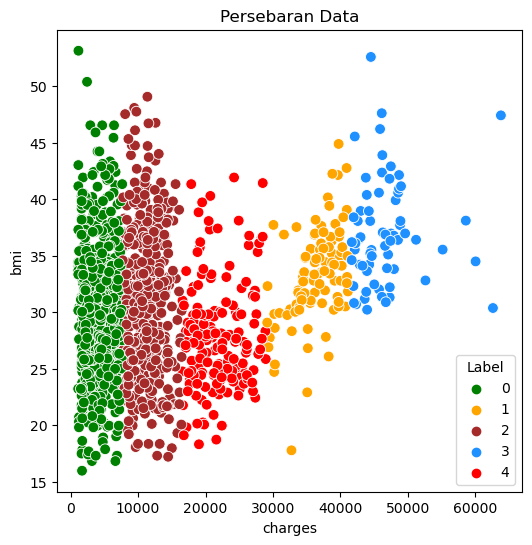

In [30]:
# persebaran data beserta labelnya 

plt.figure(figsize = (6,6))
sns.scatterplot(x = 'charges', y = 'bmi', hue = 'Label', 
palette = ['green','orange', 'brown', 'dodgerblue', 'red'], legend = 'full', data = dataset_insurance,
s = 60) 
plt.title('Persebaran Data')
plt.show()